In [1]:
 import os

In [2]:
print(os.listdir())

['.anaconda', '.android', '.AndroidStudio3.0', '.atom', '.bash_history', '.conda', '.condarc', '.cufflinks', '.dotnet', '.eclipse', '.gradle', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.m2', '.matplotlib', '.nbi', '.node_repl_history', '.oracle_jre_usage', '.p2', '.pgAdmin4.2123502176.addr', '.pgAdmin4.2123502176.log', '.plotly', '.PyCharm2018.1', '.PyCharmCE2018.1', '3D Objects', '911.csv', 'AlbumArtSmall.jpg', 'Anaconda3', 'AndroidStudioProjects', 'ankushphotos', 'AppData', 'Application Data', 'Banglore House_price.ipynb', 'Banglorehouse prediction.ipynb', 'banglore_prediction.ipynb', 'banglore_prices.ipynb', 'Black Coffer New.ipynb', 'Black Coffer.ipynb', 'BlackCoffer.ipynb', 'cik_list.csv', 'cik_list.xlsx', 'CleanupData.csv', 'Contacts', 'Cookies', 'csvfile.csv', 'db.sqlite3', 'Desktop', 'Documents', 'Downloads', 'Favorites', 'Folder.jpg', 'git', 'groupStudy.csv', 'housingData-Real.csv', 'HousingData.csv', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'Microso

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
train=pd.read_csv('train.csv')

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


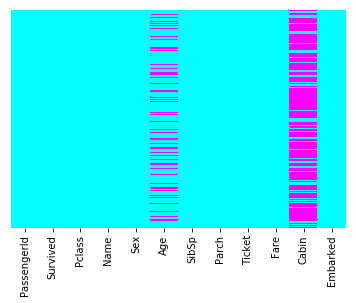

In [9]:
sns.heatmap(train.isnull(),cbar=False, yticklabels=False,cmap='cool')

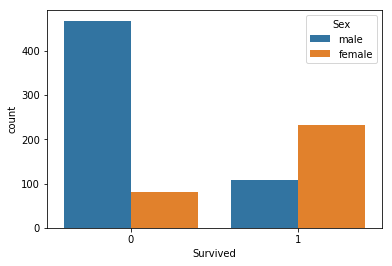

In [10]:
sns.countplot(x='Survived',hue='Sex',data=train)

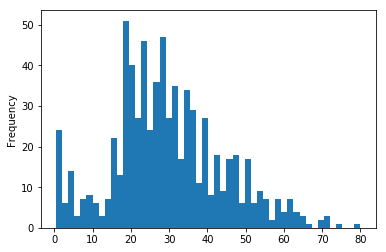

In [11]:
train['Age'].plot.hist(bins=50)

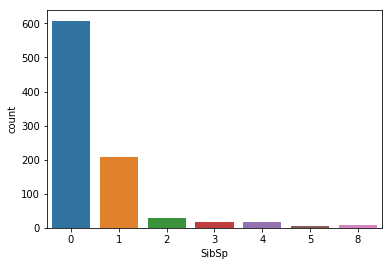

In [12]:
sns.countplot(x="SibSp",data=train)

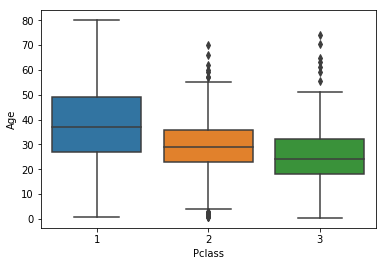

In [13]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [14]:
def imputeage(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 28
        else:
            return 25
    else:
        return Age

In [15]:
train['Age']=train[['Age','Pclass']].apply(imputeage,axis=1)

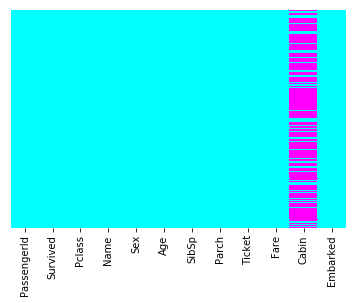

In [16]:
sns.heatmap(train.isnull(),cbar=False, yticklabels=False,cmap='cool')

In [17]:
train.drop('Cabin',axis=1,inplace=True)

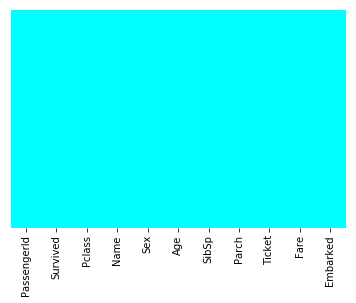

In [18]:
sns.heatmap(train.isnull(),cbar=False, yticklabels=False,cmap='cool')

In [19]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [20]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)

In [22]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
pclass=pd.get_dummies(train['Pclass'],drop_first=True)

In [24]:
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [25]:
#to add this our train data set
train=pd.concat([train,sex,embarked,pclass], axis=1)

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [27]:
train.drop(['Name','Sex','Pclass','Ticket','Embarked'],axis=1,inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [29]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [30]:
X=train.drop('Survived',axis=1)

In [31]:
y=train['Survived']

In [32]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistic_model=LogisticRegression()

In [37]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_pred=logistic_model.predict(X_test)

In [39]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
errors=confusion_matrix(y_test,y_pred)

In [42]:
errors

array([[147,  23],
       [ 35,  63]], dtype=int64)

In [43]:
logistic_model.score(X_test,y_test)

0.7835820895522388

In [44]:
test=pd.read_csv('test.csv')

In [45]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
def imputeage(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 38
        elif Pclass==2:
            return 28
        else:
            return 25
    else:
        return Age

In [47]:
test['Age']=test[['Age','Pclass']].apply(imputeage,axis=1)

In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


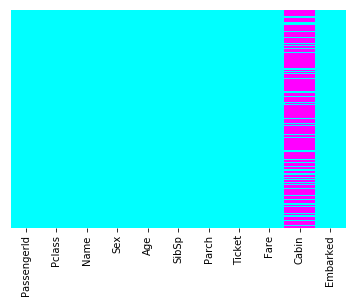

In [49]:
sns.heatmap(test.isnull(),cbar=False, yticklabels=False,cmap='cool')

In [50]:
test.drop('Cabin',axis=1,inplace=True)

In [51]:
sex=pd.get_dummies(test['Sex'],drop_first=True)

In [52]:
embarked=pd.get_dummies(test['Embarked'],drop_first=True)

In [53]:
pclass=pd.get_dummies(test['Pclass'],drop_first=True)

In [54]:
test=pd.concat([test,sex,embarked,pclass], axis=1)

In [55]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [56]:
test.drop(['Name','Sex','Pclass','Ticket','Embarked'],axis=1,inplace=True)

In [57]:
test.isnull().sum()

PassengerId    0
Age            0
SibSp          0
Parch          0
Fare           1
male           0
Q              0
S              0
2              0
3              0
dtype: int64

In [58]:
test['Fare'].fillna(value=test['Fare'].mean(),inplace=True)

In [59]:
prediction=logistic_model.predict(test)

In [60]:
len(prediction)

418

In [61]:
titanic_submission=pd.DataFrame()
titanic_submission['PassengerId'] = test['PassengerId']
titanic_submission['Survived'] = prediction

In [62]:
titanic_submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [63]:
from pandas import ExcelWriter

In [64]:
writer = ExcelWriter(r'C:\Users\hp\Desktop\data science\titanic_submission.xlsx')

In [65]:
titanic_submission.to_excel(writer,index=False)

In [66]:
writer.save()